In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Create an endpoint URL for a city.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# city_url = url + "&q=" + "Boston"

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

46.02274165977295 2.060144624119232
-55.74178647106262 111.03846935961673
-80.12088998754504 -104.57769783224651
-75.81502252216087 -75.80003333178243
52.57534901174063 6.272872652358444
-76.83114365676963 109.3415532152444
84.73944568806459 -155.57548443613007
-42.55911609162635 170.12005743242133
22.771095934390914 105.77459896035327
-21.94195751620782 117.61319423965318
-20.13048082791299 11.58173185892295
-21.54857039527765 95.82716867496151
43.71195942256006 -136.8541990406574
-81.45490504461448 -152.73568379753868
-52.302941871642794 -12.858637436505234
-50.12628429141292 94.94247436856477
-78.10787442761531 -48.184784237172124
-37.14315637933099 -63.29974125193277
-79.39439108010424 120.23437142761594
-18.456795922757763 153.4418552942729
-61.92251572833622 107.2511620519694
87.86326382512843 -141.45002747454828
84.42978452605826 -0.02473470855423443
68.2061042891853 -98.05018158647007
54.20923355529635 -120.63519473694518
-47.69154039341488 -178.573780497094
37.18876292698279 -

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(20)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | gueret
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | dalfsen
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | hokitika
Processing Record 8 of Set 1 | cao bang
Processing Record 9 of Set 1 | roebourne
Processing Record 10 of Set 1 | opuwo
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | santa rosa
Processing Record 17 of Set 1 | mackay
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | beaverlodge
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | ridgecrest


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Gueret,46.1667,1.8667,53.06,93,16,4.92,FR,2022-06-30 18:44:01
1,Albany,42.6001,-73.9662,81.64,44,16,1.01,US,2022-06-30 18:44:02
2,Punta Arenas,-53.1500,-70.9167,39.31,81,0,12.66,CL,2022-06-30 18:40:41
3,Ushuaia,-54.8000,-68.3000,35.26,64,0,2.30,AR,2022-06-30 18:41:40
4,Dalfsen,52.5000,6.2500,64.96,86,100,16.08,NL,2022-06-30 18:44:03
5,Barrow,71.2906,-156.7887,50.02,76,0,14.97,US,2022-06-30 18:44:04
6,Hokitika,-42.7167,170.9667,42.69,77,68,5.93,NZ,2022-06-30 18:44:05
7,Cao Bang,22.6667,106.2500,75.45,98,100,1.90,VN,2022-06-30 18:40:18
8,Roebourne,-20.7833,117.1333,63.27,36,4,22.79,AU,2022-06-30 18:44:05
9,Opuwo,-18.0607,13.8400,60.66,40,94,7.38,NA,2022-06-30 18:44:06


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [18]:
# Get today's date in seconds.
today = time.time()
today

1656623642.9420378

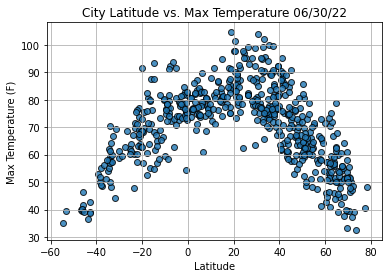

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

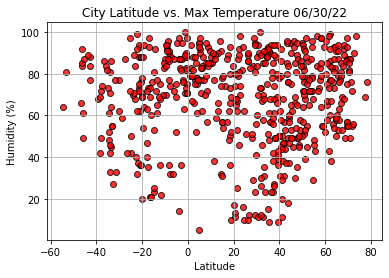

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, c='r', edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

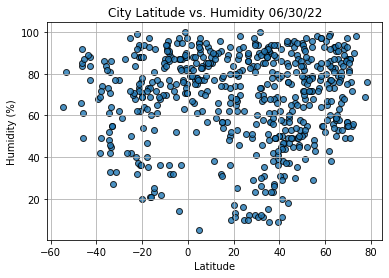

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

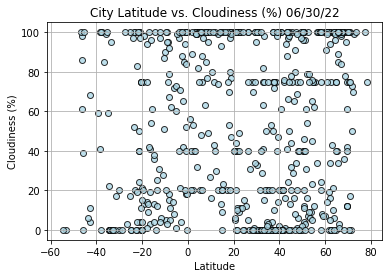

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            c='lightblue',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

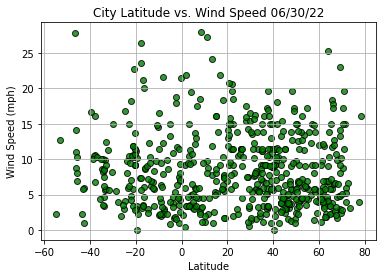

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            c='g',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()